Aggregator of Terastallization Type Data from play.pokemonshowdown.com
Each Pokemon has a raw tera type value, and we can aggregate this data across every pokemon.

In [1]:
# Fetch the data
import requests

def get_chaos_data(month, year, tier, rating = "1630"):
    # https://www.smogon.com/stats/2024-11/chaos/gen9ou-1695.json
    if tier == "gen9ou":
        rating = "1695"
    url = f"https://www.smogon.com/stats/{year}-{month}/chaos/{tier}-{rating}.json"

    response = requests.get(url)

    if response:
        return response.json()
    else:
        raise Exception(f'Request to {url} failed: {response.status_code}')



In [2]:

from datetime import datetime

last_month = "02"
current_year = 2025
POKEMON_TYPES = ["stellar", "bug", "dark", "dragon", "electric", "fairy", "fighting", "fire", 
         "flying", "ghost", "grass", "ground", "ice", "normal", "poison", "psychic", 
         "rock", "steel", "water"]
tera_types = dict.fromkeys(POKEMON_TYPES, 0)

OU_data = get_chaos_data(last_month, current_year, "gen9ou")

for pokemon in OU_data["data"]:
    for type in OU_data['data'][pokemon]["Tera Types"]:
        tera_types[type] += OU_data['data'][pokemon]["Tera Types"][type]


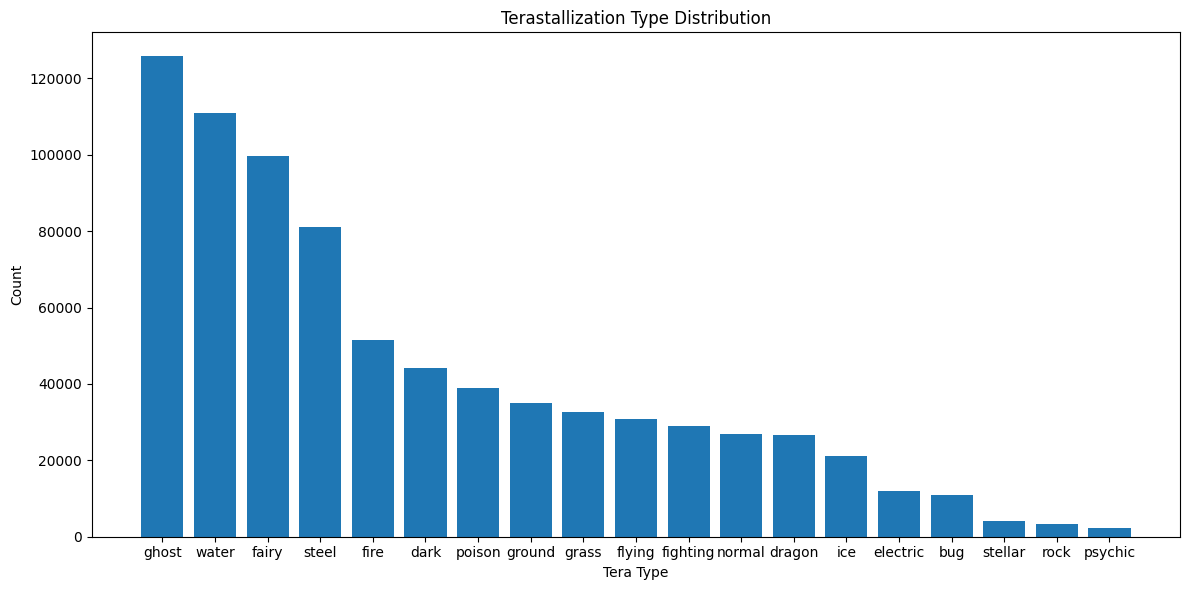

In [7]:
import matplotlib.pyplot as plt

# Convert dictionary data into lists for plotting and sort by count
sorted_items = sorted(tera_types.items(), key=lambda x: x[1], reverse=True)
types = [item[0] for item in sorted_items]
counts = [item[1] for item in sorted_items]

plt.figure(figsize=(12, 6)) 
plt.bar(types, counts)

plt.title('Terastallization Type Distribution')
plt.xlabel('Tera Type')
plt.ylabel('Count')

plt.xticks(rotation=10, ha='center')

plt.tight_layout()

plt.show()